In [122]:
from typing import List

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Analiza zbioru danych `Breast Cancer`

Celem projektu jest....

##### 1. Wczytanie danych

In [37]:
df: pd.DataFrame = pd.read_csv(
    'breast-cancer.data', sep=',',
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
)

print(f"Data shape: {df.shape}")
df.head()

Data shape: (286, 10)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


##### 1.1 Opis danych

1. **Class**: no-recurrence-events, recurrence-events
2. **age**: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. **menopause**: lt40, ge40, premeno.
4. **tumor-size**: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. **inv-nodes**: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. **node-caps**: yes, no.
7. **deg-malig**: 1, 2, 3.
8. **breas**t: left, right.
9. **breast-quad**: left-up, left-low, right-up, right-low, central.
10. **irradia**t: yes, no.

In [20]:
df.dtypes

Class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [38]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


* Nie ma brakujących danych

In [25]:
df.isna().any()

Class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

no-recurrence-events:  201
recurrence-events t:  85


C:\Users\Kamil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


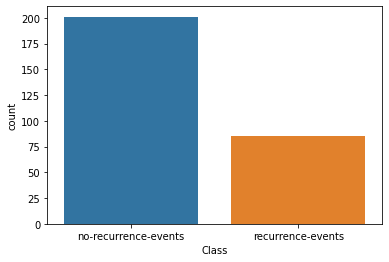

In [35]:
ax = sns.countplot(df['Class'], label="Count")

A, B = df['Class'].value_counts()
print('no-recurrence-events: ', A)
print('recurrence-events t: ', B)

#### 2. Przetwarzanie i wizualizacja danych

##### 2.1 Konwersja do danych liczbowych 

Konwersja `Class` do wartości `0` i `1`

In [46]:
df['Class'] = pd.Categorical(df['Class']).codes

Konwersja kolumn nie numerycznych mdo danych numerycznych metodą - `One Hot Encoding`:

In [54]:
df_numeric = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns)
df_numeric.head()

,Class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,0,3,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,2,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,2,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [56]:
df_numeric.describe()

,Class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,2.048951,0.003497,0.125874,0.314685,0.335664,0.199301,0.020979,0.451049,0.024476,...,0.531469,0.468531,0.003497,0.073427,0.384615,0.339161,0.083916,0.115385,0.762238,0.237762
std,0.457828,0.738217,0.059131,0.332289,0.465204,0.473050,0.400175,0.143565,0.498470,0.154791,...,0.499883,0.499883,0.059131,0.261293,0.487357,0.474254,0.277748,0.320046,0.426459,0.426459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2.2 Wizualizacja danych

Korelacje:

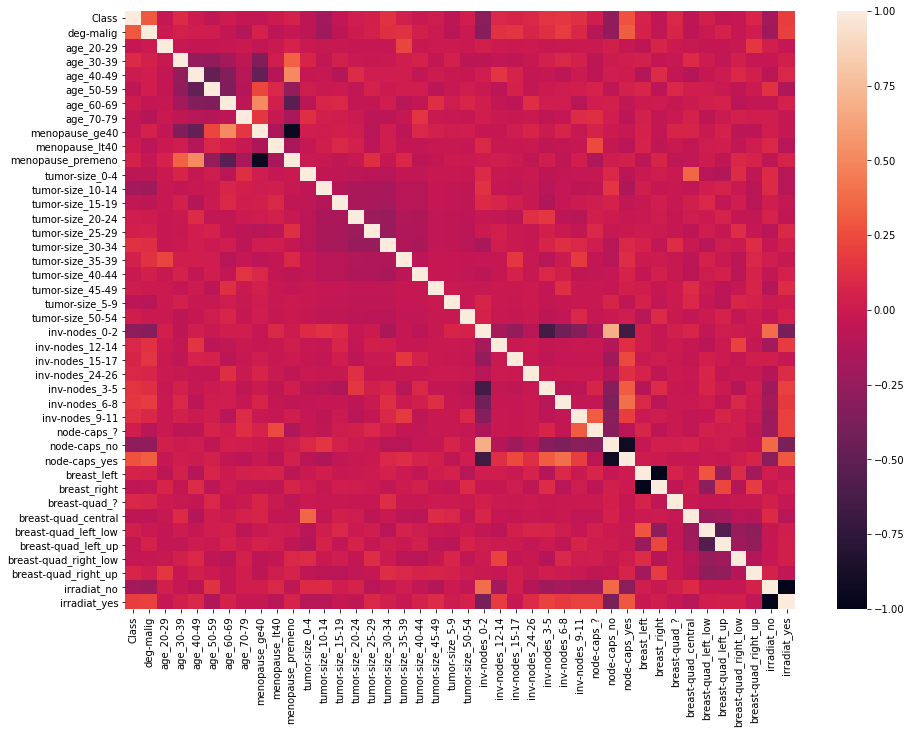

In [70]:
corr = df_numeric.corr()

f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(corr)
plt.show()

##### 2.3 Przygotowanie danych do uczenia

In [119]:
y = df_numeric['Class']
X = df_numeric.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=421, shuffle=True)

### 3. Model - regresja logistyczna

Użyjemy modelu regresji logistycznej - na początek wersja bazowa, dla całego zbioru danych uczących, bez żadnej selekcji cech oraz z domyślnymi parametrami modelu.

In [120]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.6379310344827587

In [145]:
def evaluate_clf(clf, K: int = 10) -> np.ndarray:
    scores = cross_val_score(clf, X_test, y_test, cv=K) * 100
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(data=scores, marker='o', color='#965786')
    ax.set_title('Scores')
    ax.set(xlabel=f'{K}-cross validation', ylabel='Accuracy [%]')
    plt.show()
    
    return scores

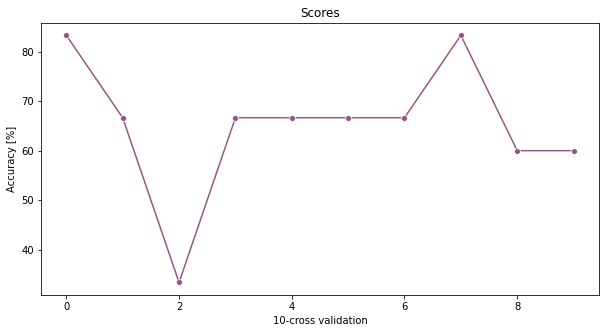

array([83.33333333, 66.66666667, 33.33333333, 66.66666667, 66.66666667,
       66.66666667, 66.66666667, 83.33333333, 60.        , 60.        ])

In [146]:
evaluate_clf(clf)

##### 3.1 Szukanie optymalnych parametrów dla wszystkich danych

In [149]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 10),
    'l1_ratio': np.linspace(0, 1, 10),
    'max_iter': [50, 100, 150, 200]
}

clf = linear_model.LogisticRegression()
gcv = GridSearchCV(clf, parameters, scoring='accuracy')

gcv.fit(X_train, y_train)
best_params = gcv.best_params_

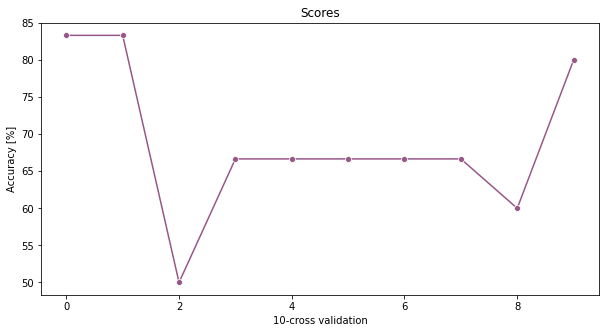

array([83.33333333, 83.33333333, 50.        , 66.66666667, 66.66666667,
       66.66666667, 66.66666667, 66.66666667, 60.        , 80.        ])

In [147]:
best_clf = linear_model.LogisticRegression(**best_params)

best_clf.fit(X_train, y_train)
evaluate_clf(best_clf)

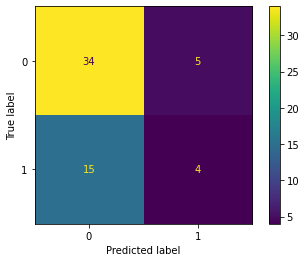

In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_clf, X_test, y_test)
plt.show()